In [1]:
import sys
sys.path.append('../code')

In [2]:
import propagation as prop
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
rois = 'C:/Users/Fredrik/Desktop/AnnotateTest/Results/600nmPsl_b/particles.npy'

In [4]:
rois = np.load(rois)

In [5]:
rois.shape

(14, 64, 64, 2)

In [6]:
P = prop.Propagator(image_size=(64, 64), padding=256)

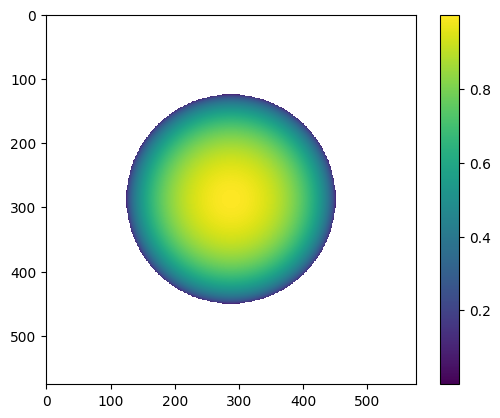

In [7]:
plt.imshow(P.K.real.cpu().numpy())
plt.colorbar()

In [8]:
Z = np.linspace(-10, 10, 51)

In [9]:
res = P.forward(rois[0], Z)

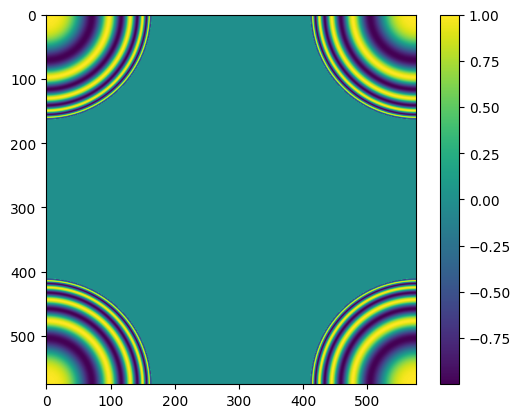

In [10]:
plt.imshow(P.Tz[20].real.cpu().numpy())
plt.colorbar()

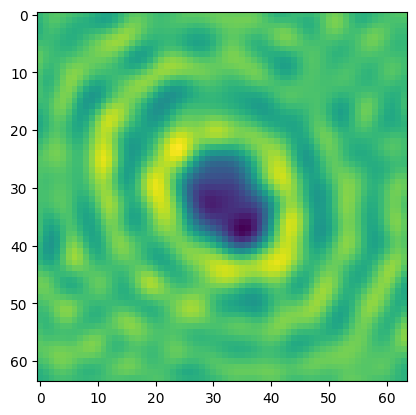

In [11]:
plt.imshow(rois[0,...,0])

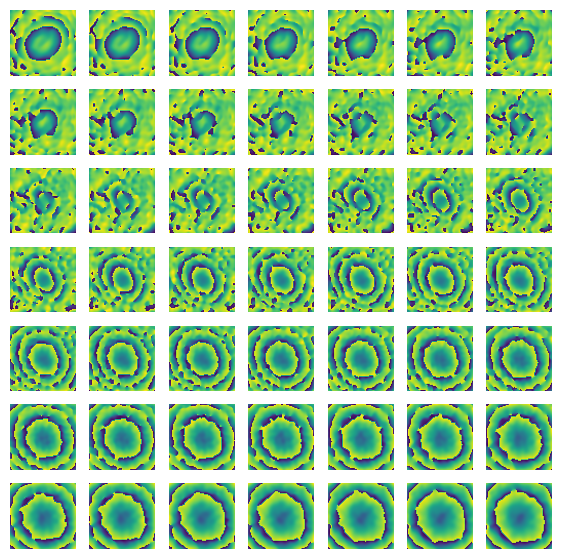

In [12]:
#Plot a grid of the results
#7x7 grid
fig, axs = plt.subplots(7, 7, figsize=(7, 7))

for i in range(7):
    for j in range(7):
        im = torch.angle(res[i*7 + j]).cpu()
        im = torch.remainder(im, 2*torch.pi)

        axs[i, j].imshow(im.cpu().numpy())
        axs[i, j].axis('off')


In [13]:
rf, rc = P.find_focus_field(rois[2], criterion='sum', criterion_pre='laplace', crit_max = False, return_crit=True)

In [14]:
rc

tensor([-62.4567, -65.1223, -67.8593, -66.0478, -60.7962, -60.7672, -65.9484,
        -64.7428, -58.7632, -61.1702, -61.8317, -57.2391, -62.1837, -59.2741,
        -62.1023, -61.3181, -63.1985, -60.6864, -63.1192, -61.0583, -61.0070,
        -63.6657, -65.1339, -66.1310, -69.3086, -90.4476, -69.9341, -67.5301,
        -67.8739, -69.0333, -67.7515, -65.7992, -64.1154, -60.2072, -63.0927,
        -65.1896, -69.7962, -70.3733, -73.8606, -68.5679, -69.7123, -66.3046,
        -60.5539, -61.2949, -59.9695, -55.9976, -57.6403, -62.3708, -65.0486,
        -65.8868, -69.1014], device='cuda:0')

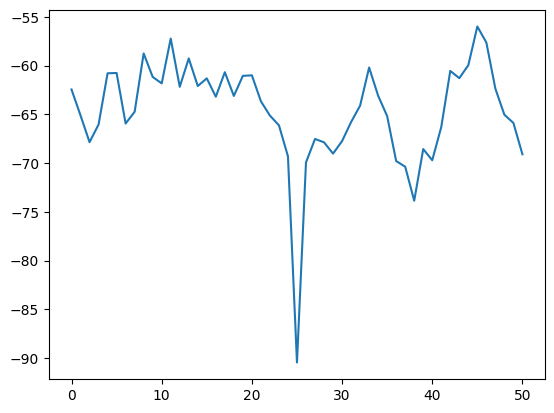

In [15]:
plt.plot(rc.cpu().numpy())

In [16]:
torch.tensor(1).real

tensor(1)

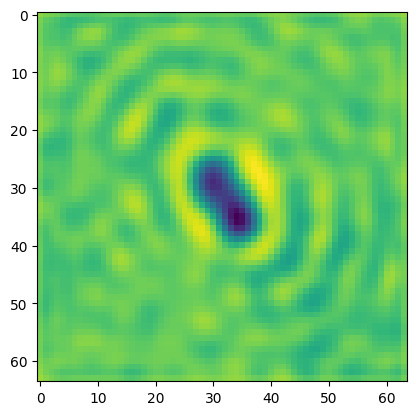

In [17]:
plt.imshow(rf.imag.cpu().numpy())